In [48]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [49]:
weight = 0.7
bias = 0.3

X = torch.arange(start=0, end=1, step=0.001).unsqueeze(dim=1)
y = weight * X + bias

noise = torch.randn_like(y) * 0.09

y = y + noise

X[:10], y[:10]


(tensor([[0.0000],
         [0.0010],
         [0.0020],
         [0.0030],
         [0.0040],
         [0.0050],
         [0.0060],
         [0.0070],
         [0.0080],
         [0.0090]]),
 tensor([[0.3811],
         [0.1112],
         [0.3625],
         [0.1910],
         [0.2989],
         [0.1591],
         [0.4651],
         [0.2619],
         [0.2703],
         [0.1800]]))

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

len(X_train), len(y_train), len(X_test), len(y_test)


(800, 800, 200, 200)

In [51]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=6, label="training data:")
    
    plt.scatter(test_data, test_labels, c="g", s=6, label="test data:")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=9, label="Predictions")

    plt.legend(prop={"size": 14})

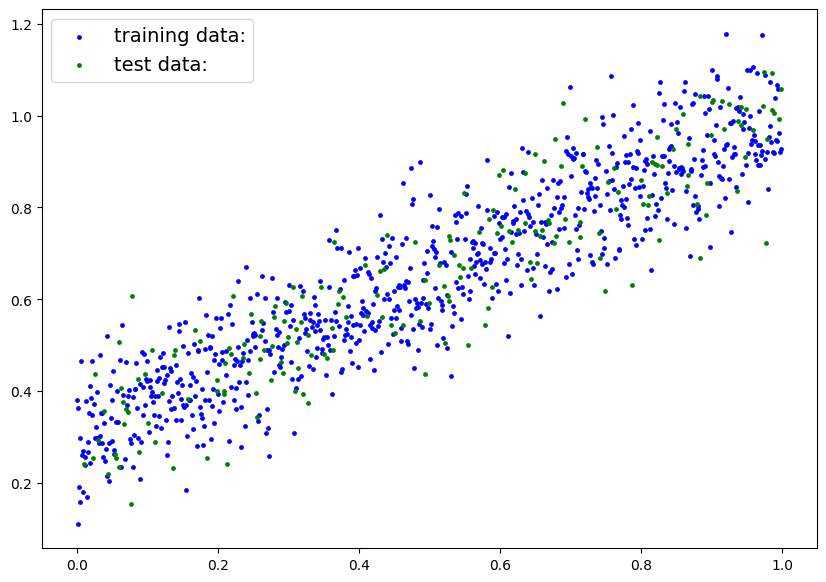

In [52]:
plot_predictions()

In [53]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
         
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

OrderedDict([('weight', tensor([-1.4624])), ('bias', tensor([0.7523]))])


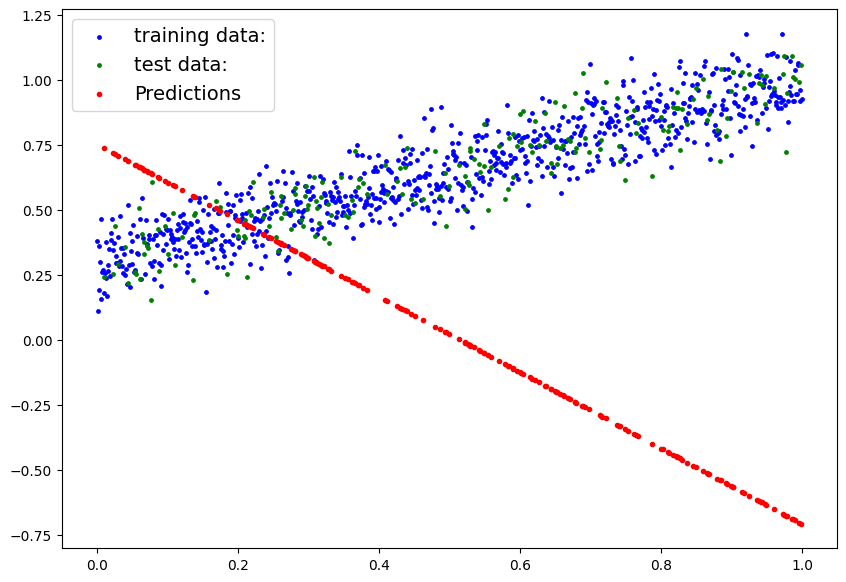

In [54]:
#just test this shit and dont train model

torch.manual_seed(47)

model_0 = LinearRegressionModel()

list(model_0.parameters())

print(model_0.state_dict())

#just test this shit and dont train model
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [55]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr= 0.05)

In [56]:
torch.manual_seed(47)

epochs = 300 

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        train_pred = model_0(X_train)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"epoch: {epoch}      |      MAE on train loss: {loss}      |      MAE on test loss: {test_loss}")
        



epoch: 0      |      MAE on train loss: 0.7256569862365723      |      MAE on test loss: 0.7036884427070618
epoch: 10      |      MAE on train loss: 0.5354912281036377      |      MAE on test loss: 0.5248875617980957
epoch: 20      |      MAE on train loss: 0.45576438307762146      |      MAE on test loss: 0.45148974657058716
epoch: 30      |      MAE on train loss: 0.417711079120636      |      MAE on test loss: 0.4135189950466156
epoch: 40      |      MAE on train loss: 0.3897596597671509      |      MAE on test loss: 0.38514527678489685
epoch: 50      |      MAE on train loss: 0.3644385039806366      |      MAE on test loss: 0.3598775863647461
epoch: 60      |      MAE on train loss: 0.3401780426502228      |      MAE on test loss: 0.33588340878486633
epoch: 70      |      MAE on train loss: 0.31626075506210327      |      MAE on test loss: 0.3121814429759979
epoch: 80      |      MAE on train loss: 0.29252147674560547      |      MAE on test loss: 0.28874507546424866
epoch: 90     

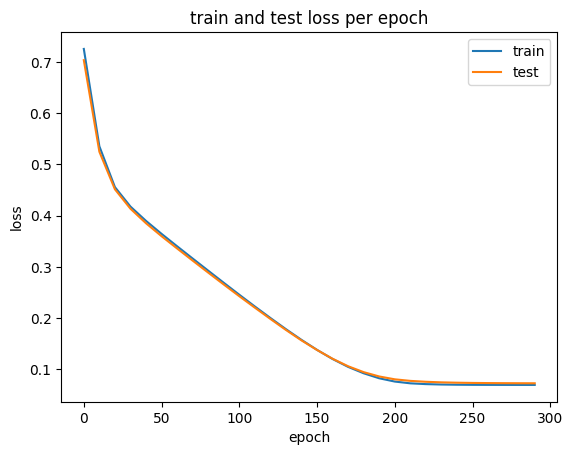

In [57]:
plt.plot(epoch_count, train_loss_values, label="train")
plt.plot(epoch_count, test_loss_values, label="test")

plt.title("train and test loss per epoch")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

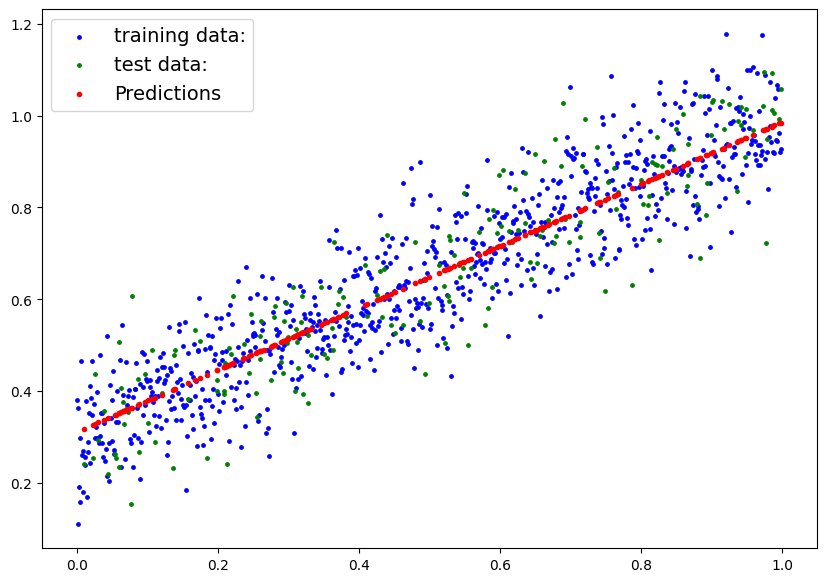

In [58]:
plot_predictions(predictions=test_pred)

In [59]:
from pathlib import Path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: model\01_pytorch_workflow_model_0.pth


In [60]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [61]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(5)

loaded_model_preds

tensor([3.6850])

In [62]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [63]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6747])), ('bias', tensor([0.3117]))])